### Load a map

In [1]:
from pymapmanager.mmMap import mmMap

# load a map
filePath = '/Users/cudmore/Desktop/data/cudmore/rr30a/rr30a.txt'
m = mmMap(filePath=filePath)

map rr30a loaded in 0.42 seconds.


### Generate new analysis by doing algebra on existing annotations

In [2]:
import numpy as np
from pymapmanager.mmUtil import newplotdict

# get values of annotaitons from our map m
pdOther = newplotdict()
pdOther['xstat'] = 'ubssSum_int2' # background-subtracted spine sum, channel 2
pdOther['ystat'] = 'ubsdSum_int2' # background subtracted dendrite sum, channel 2
#pdOther['zstat'] = 'isTransient'
pdOther = m.getMapValues3(pdOther)

# Do some algebra across annotations and generate your own new values
mRows = pdOther['x'].shape[0]
nCols = pdOther['x'].shape[1]
myNewStat = np.zeros([mRows,nCols])
myNewStat[:] = 'nan'

for (x,y), value in np.ndenumerate(pdOther['x']):
    # myNewStat is 'ubssSum_int2 / ubsdSum_int2'
    myNewStat[x,y] = pdOther['x'][x,y] / pdOther['y'][x,y]

mmMap.getMapValues3() took 0.21 seconds


### Plot our new analysis

<IPython.core.display.Javascript object>


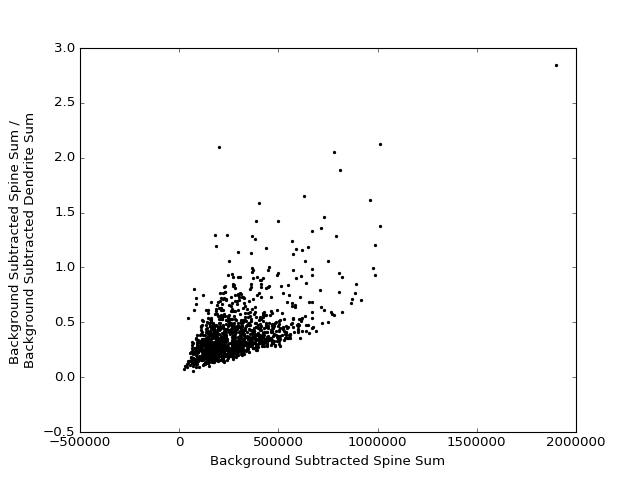

In [3]:
# plot with matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
x = pdOther['x']
y = myNewStat
plt.scatter(x, y, marker='.', c='k', s=15)
plt.xlabel('Background Subtracted Spine Sum')
plt.ylabel('Background Subtracted Spine Sum / \nBackground Subtracted Dendrite Sum')
plt.show()

## Homework

 - Do the same but limit analysis to one map segment. Hint, use pd['segmentID']=[1] for segment 1.
 - Do the same but get statistics (mean/sd/se) for each map segment

### Autocorrelation along a dendritic segment

In [9]:
import time
from pandas.tools.plotting import autocorrelation_plot

def segmentAnalysis(map, ps):
    startTime = time.time()

    ps['ystat'] = 'pDist'

    for i in range(map.numMapSegments):
        for j in range(map.numSessions):
            stackSegment = map._getStackSegmentID(i, j)
            if stackSegment is not None:
                ps['segmentid'] = [stackSegment]
                ps = map.stacks[j].getStackValues3(ps)
                # sort by pDist and make ['x'] values follow
                sortedIdx = np.argsort(ps['y'])
                xSorted = ps['x'][sortedIdx]
                ySorted = ps['y'][sortedIdx]
                if i==0 and j==0:
                    print xSorted
                    autocorrelation_plot(xSorted)

    stopTime = time.time()
    print 'segmentAnalysis() took', stopTime - startTime, 'seconds'


<IPython.core.display.Javascript object>


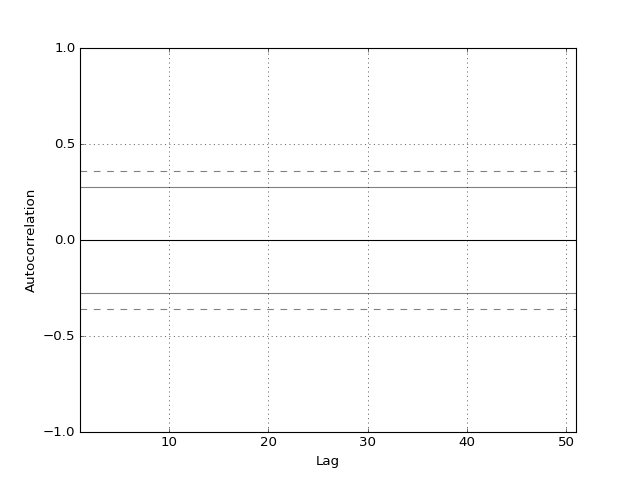

[ 358654.  325830.  437393.  276902.  233753.  409029.  160809.  371142.
  279043.  222450.  449625.  382487.  375501.  224195.  295078.  198564.
  222602.  183961.  207319.  186176.  156378.  362268.  423851.  140341.
  359116.  112975.  268025.  291595.  140028.  372235.  229844.  505666.
  331293.  416653.  477492.  346847.  175964.  196180.  531478.  279223.
  272662.  114001.  274718.  194726.  276902.  232024.  491580.  353707.
  358254.  267986.      nan]
segmentAnalysis() took 0.194261074066 seconds


In [10]:
#from pymapmanager.mmMapAnalysis import segmentAnalysis

ps = newplotdict()
ps['xstat'] = 'ubssSum_int2'

plt.figure()

ps = segmentAnalysis(m, ps)

